# Redes Neurais Convolucionais (CNNs)

**[Visão Computacional](https://denmartins.github.io/teaching/2025-visao-computacional)** | **[Prof. Dr. Denis Mayr Lima Martins](https://denmartins.github.io/)**

## Recap: MLP para o MNIST dataset
---

<div style='align: left; text-align:center;'>
    <img src='https://editor.analyticsvidhya.com/uploads/95577cnn2.gif' alt='MLP para MNIST dataset.' style="width:600px;"/>
    <span style='display:block;'>MLP para MNIST dataset. Fonte: <a href="https://editor.analyticsvidhya.com/uploads/95577cnn2.gif" target="_blank"> Analytics Vidhya</a>.</span>
    <br/>
</div>


## Neurônio da Camada Escondida
---

<center>
<table style="width:100%;border:none;">
<tr>
<td style="vertical-align:middle;text-align:center;border:none;">
    <img src='https://ml4a.github.io/images/figures/mnist_1layer.png' style="width:100%;"/>
    <span style='display:block;'>Rede de 1 camada para o MNIST dataset. Fonte: <a href="https://ml4a.github.io/ml4a/looking_inside_neural_nets/" target="_blank">ML4a</a>.</span>
</td>
<td style="vertical-align:middle;text-align:center;border:none;">
    <img src='https://ml4a.github.io/images/figures/weights_analogy_1.png' style="width:100%;"/>
    <span style='display:block;'>Net input de um neurônio na camada escondida. Fonte: <a href="https://ml4a.github.io/ml4a/looking_inside_neural_nets/" target="_blank">ML4a</a>.</span>
</td>
</tr>
</table>
</center>


## Neurônio da Camada Escondida
---

<div style='align: left; text-align:center;'>
    <img src='https://ml4a.github.io/images/figures/rolled_weights_mnist_0.png' alt='Representação em Imagem de um Neurônio da Camada Escondida de uma MLP para o MNIST dataset.' style="width:800px;"/>
    <span style='display:block;'>Representação em Imagem de um Neurônio da Camada Escondida de uma MLP para o MNIST dataset. Fonte: <a href="https://ml4a.github.io/ml4a/looking_inside_neural_nets/" target="_blank"> ML4a</a>.</span>
    <br/>
</div>

## Neurônio da Camada Escondida
---

<div style='align: left; text-align:center;'>
    <img src='https://ml4a.github.io/images/figures/rolled_weights_mnist.png' alt='Visualização dos Neurônios da Camada de Saída de uma MLP para o MNIST dataset.' style="width:800px;"/>
    <span style='display:block;'>Visualização dos Neurônios da Camada de Saída de uma MLP para o MNIST dataset.. Fonte: <a href="https://ml4a.github.io/ml4a/looking_inside_neural_nets/" target="_blank"> ML4a</a>.</span>
    <br/>
</div>

## Limitações da Rede MLP
---

- **Dimensionalidade Alta:** Uma imagem 224x244x3 tem 150.528 pixels/entradas. Cada neurônio na primeira camada oculta de um MLP precisaria de 150.528 pesos, levando a bilhões de parâmetros treináveis em uma rede profunda.
- O grande número de parâmetros torna o modelo propenso a **overfitting** (superajuste).

<div style='align: left; text-align:center;'>
    <img src='https://learnopencv.com/wp-content/uploads/2023/01/tensorflow-keras-mlp-parameters-1024x414.png' alt='MLPs têm alta dimensionalidade.' style="width:800px;"/>
    <span style='display:block;'>Alta dimensionalidade das MLPs para imagens. Frequentemente levando a overfitting. Fonte: <a href="https://learnopencv.com/understanding-convolutional-neural-networks-cnn/" target="_blank"> LearnOpenCV</a>.</span>
    <br/>
</div>



<div style='align: left; text-align:center;'>
    <img src='https://media.datacamp.com/legacy/v1700044100/image3_93b1b7c0d9.png' alt='Underfitting versus Overfitting.' style="width:800px;"/>
    <span style='display:block;'>Underfitting versus Overfitting. Fonte: <a href="https://www.datacamp.com/pt/tutorial/introduction-to-convolutional-neural-networks-cnns" target="_blank"> DataCamp</a>.</span>
    <br/>
</div>



## Limitações da Rede MLP
---
- **Perda de Estrutura Espacial:** MLPs exigem que a imagem 2D/3D seja "achatada" (flattened) em um vetor 1D.
- Isso destrói a informação de localidade: pixels próximos (semânticos) são tratados da mesma forma que pixels distantes.

<div style='align: left; text-align:center;'>
    <img src='https://learnopencv.com/wp-content/uploads/2023/01/tensorflow-keras-mlp-image-translation.png' alt='MLPs não são invariantes à translação' style="width:800px;"/>
    <span style='display:block;'>MLPs não são invariantes à translação. Fonte: <a href="https://learnopencv.com/understanding-convolutional-neural-networks-cnn/" target="_blank"> LearnOpenCV</a>.</span>
    <br/>
</div>


## Objetivos de Aprendizagem
---

- Explicar por que CNNs são adequadas para dados de imagem.  
- Descrever os blocos fundamentais (convolução, padding, stride, pooling, ativação).  
- Esboçar uma arquitetura simples de CNN e justificar cada componente.  
- Implementar um CNN mínimo em PyTorch que classifica dígitos MNIST.  

## Redes Neurais Convolucionais
---

- Convolutional Neural Nets (**CNNs** ou ConvNets) são arquiteturas de redes neurais otimizadas para dados com estrutura de grade, como imagens.
- CNN aplica uma série de transformações na imagem original (veja esquema abaixo) com três tipos de camadas (**convolution, pooling e fully connected**).
- A sequência de camadas antes da camada fully connected é chamada de extrator de características.
<div style='align: left; text-align:center;'>
    <img src='https://wiki.pathmind.com/images/wiki/convnet.png' alt='Exemplo de CNN' style="width:800px;"/>
    <span style='display:block;'>Estrutura geral de uma CNN. Fonte: <a href="https://wiki.pathmind.com/convolutional-network" target="_blank"> pathmind</a>.</span>
    <br/>
</div>

## Demo de CNN para o MNIST
---

<div style='align: left; text-align:center;'>
    <img src='https://www.popsci.com/wp-content/uploads/2019/03/18/YJNDG7MQQDINTOGCDUJGTHZ4N4.png' alt='Demonstração de CNN para MNIST' style="width:400px;"/>
    <span style='display:block;'>Estrutura geral de uma CNN. Fonte: <a href="https://adamharley.com/nn_vis/cnn/3d.html" target="_blank"> Adam W. Harley</a>.</span>
    <br/>
</div>

<center>


</center>

## CNN em Pytorch: Demo
---

Código completo no site do professor: [https://denmartins.github.io](https://denmartins.github.io/visao-computacional-book/vcnotebooks/VC-Redes-Neurais-Convolucionais.html#cnn-em-pytorch-demo).

In [1]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.sequential = nn.Sequential(
            # Primeira camada convolucional
            nn.Conv2d(in_channels=1, out_channels=32, 
                      kernel_size=2, padding=1),
            nn.ReLU(),
            # Segunda camada convolucional
            nn.Conv2d(in_channels=32, out_channels=64, 
                      kernel_size=2, padding=1),
            # Pooling Max: 2x2
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Flatten de matriz para vetor.
            nn.Flatten(),
            # Definindo as camadas FC
            # Camada Totalmente Conectada 1
            nn.Linear(14400, 128),
            nn.ReLU(),
            # Camada de Saída (10 classes para MNIST)
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.sequential(x)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
from torchvision import datasets
from tqdm.notebook import trange

In [3]:
# Número de processos para o dataloader
NUM_WORKERS = 0
# Quantas amostras (imagens) por batch
BATCH_SIZE = 128
# Converte dados em tensores
transform = transforms.ToTensor()

# Carrega dados de treino e teste
train_data = datasets.MNIST(root='data', train=True,
    download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
    download=True, transform=transform)

# Cria dataset de validação
VALIDATION_SIZE = 0.1
n_train_examples = int(len(train_data) * VALIDATION_SIZE)
n_valid_examples = len(train_data) - n_train_examples

train_data, valid_data = data.random_split(
    train_data, [n_train_examples, n_valid_examples])

# Data Loaders
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, 
   batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)
valid_loader = torch.utils.data.DataLoader(valid_data,
   batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)
test_loader = torch.utils.data.DataLoader(test_data, 
  batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)

In [4]:
def set_device(on_gpu=True):
    has_mps = torch.backends.mps.is_available()
    has_cuda = torch.cuda.is_available()
    return "mps" if (has_mps and on_gpu) \
            else "cuda" if (has_cuda and on_gpu) \
            else "cpu"

In [5]:
torch.manual_seed(42)

EPOCHS = 10
device = set_device(on_gpu=True)
model = SimpleCNN()
model = model.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Num. Parâmetros no modelo:", num_parameters)

Num. Parâmetros no modelo: 1853034


In [6]:
def correct(output, target):
    predicted_digits = output.argmax(1)                            # Posição com maior valor da saída
    correct_ones = (predicted_digits == target).type(torch.float)  # 1.0 se acertou, 0.0 caso contrário
    return correct_ones.sum().item()                               # Conta o número de acertos

def train_model_mini_batch_with_validation(epochs, train_loader, valid_loader, model, loss_function, optimizer):
    tr_loss = [0.]*epochs
    val_loss = [0.]*epochs

    with trange(epochs, desc="Training", leave=False) as tepoch:
        for epoch in range(epochs):
            model.train()
            train_total_loss = 0.0
            total_correct = 0.0
           

            for data, target in train_loader:
                # Copia dados para o device (ex.: GPU)
                data = data.to(device)
                target = target.to(device)
                
                # Forward pass
                output = model(data)
                
                # Calcula loss
                loss = loss_function(output, target)
                train_total_loss += loss.item()

                # Conta acertos
                total_correct += correct(output, target)
                
                # Backward pass: Backpropagation
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            avg_tr_loss = train_total_loss / len(train_loader)
            tr_loss[epoch] = avg_tr_loss
            training_accuracy = total_correct / len(train_loader.dataset) * 100
            
            # Validation phase
            model.eval()  # Set the model to evaluation mode
            val_total_loss = 0.0
            val_total_correct = 0
            

            with torch.no_grad():
                for data, target in valid_loader:
                    data = data.to(device)
                    target = target.to(device)
                    
                    # Forward pass
                    output = model(data)
                    
                    # Calcula loss
                    loss = loss_function(output, target)
                    val_total_loss += loss.item()

                    # Conta acertos
                    val_total_correct += correct(output, target)

            avg_val_loss = val_total_loss / len(valid_loader)
            val_loss[epoch] = avg_val_loss
            validation_accuracy = val_total_correct / len(valid_loader.dataset) * 100
            tepoch.set_postfix(train_loss=avg_tr_loss, train_acc=training_accuracy, val_loss=avg_val_loss, val_acc=validation_accuracy)
            tepoch.update(1)

    epoch_ticks = [i+1 for i in range(epochs)]
    plt.figure(figsize=(4,3))
    sns.lineplot(x=epoch_ticks, y=tr_loss, marker="o", label="Train. Loss" )
    sns.lineplot(x=epoch_ticks, y=val_loss, marker="^", linestyle="--", label="Valid. Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title("Comportamento da Loss")
    plt.legend()
    sns.despine()
    plt.show()

Training:   0%|          | 0/10 [00:00<?, ?it/s]

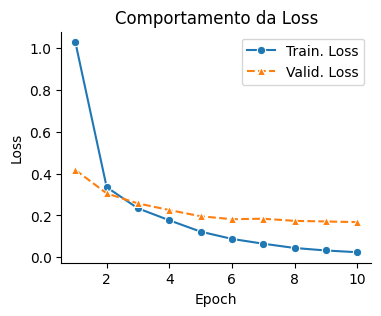

In [7]:
train_model_mini_batch_with_validation(
    EPOCHS, 
    train_loader, 
    valid_loader, 
    model, 
    loss_function, 
    optimizer)

## Convolução em CNNs
---

<center>
<table style="width:100%;border:none;">
<tr>
<td style="vertical-align:middle;text-align:left;border:none;">

- O bloco fundamental de uma CNN é a **Camada Convolucional**.
- A convolução é uma busca por padrões: o filtro desliza sobre a imagem, procurando por uma característica específica.
- Se o padrão do filtro corresponder à região da imagem, o resultado será um valor alto (ativação).
- **Conectividade Local:** Os neurônios da CNN se conectam apenas a uma pequena região local do volume de entrada, chamada **campo receptivo**.
- Isso explora a correlação local, pois as características importantes (bordas, curvas) são localizadas.

</td>
<td style="vertical-align:middle;text-align:center;border:none;">
<img src="https://www.tutorialspoint.com/tensorflow/images/convolutional_neural_networks.jpg"/>
 <span style='display:block;'>Convolução na camada escondida. Fonte: <a href="http://neuralnetworksanddeeplearning.com/chap6.html" target="_blank">Michael Nielsen</a>.</span>
</td>
</tr>
</table>
</center>




## Convolução em CNNs
---

<center>
<table style="width:100%;border:none;">
<tr>
<td style="vertical-align:middle;text-align:left;border:none;width:40%;">

- Cada filtro na camada convolucional aprende a detectar um tipo de característica (**feature**).
- Nas camadas iniciais, os filtros detectam características de baixo nível, como bordas horizontais, verticais e curvas.
- **O filtro em si é uma matriz de pesos (parâmetros) cujos valores são aprendidos durante o treinamento via backpropagation.**

</td>
<td style="vertical-align:middle;text-align:center;border:none;">
<img src="https://www.tutorialspoint.com/tensorflow/images/convolutional_neural_networks.jpg" width="600">
 <span style='display:block;'>Convolução no primeiro neurônio da camada escondida. Fonte: <a href="http://neuralnetworksanddeeplearning.com/chap6.html" target="_blank">Michael Nielsen</a>.</span>
</td>
</tr>
</table>
</center>


## Convolução em CNNs
---

- A operação de convolução (para fins de CNN) é o **produto escalar** (multiplicação elemento a elemento seguida por soma) entre o filtro e a região de entrada correspondente. $\text{Output} = \sum_{i, j} (\text{Input}_{i, j} \times \text{Filter}_{i, j}) + \text{Bias} $
- O resultado é um único número que mede o grau de correspondência do filtro com a região de entrada. Veja também: [Convolution arithmetic](https://github.com/vdumoulin/conv_arithmetic).
- Esse processo é repetido para cada localização onde o filtro desliza.
- Os resultados são colocados em uma matriz de saída chamada **Mapa de Ativação** (Activation Map) ou **Mapa de Características** (Feature Map).

<div style='align: left; text-align:center;'>
    <img src='https://poloclub.github.io/cnn-explainer/assets/figures/convlayer_detailedview_demo.gif' alt='Convolução CNN' style="width:400px;"/>
    <span style='display:block;'>Convolução e Feature Map. Fonte: <a href="https://poloclub.github.io/cnn-explainer/" target="_blank"> CNN Explainer</a>.</span>
    <br/>
</div>


## Convolução 3D
---

<div style='align: left; text-align:center;'>
    <img src='https://framerusercontent.com/images/ZS9Atu2axnCtVjlj1gKbXMLAA78.png' alt='Convolução CNN' style="width:600px;"/>
    <span style='display:block;'>Convolução e Volume. Fonte: <a href="https://www.v7labs.com/blog/convolutional-neural-networks-guide" target="_blank"> V7 Labs</a>.</span>
    <br/>
</div>


## Hyperparâmetros da Convolução
---

- **Kernel Size ($F$):** Tamanhos comuns são $3 \times 3$ ou $5 \times 5$. Tamanhos menores são frequentemente preferidos para extrair features com menos parâmetros.
- **Número de Filtros:** Aumenta com a profundidade; geralmente começa em 32 e dobra (64, 128, etc.).
- **Stride ($S$):** É o número de pixels que o filtro se move (desloca) sobre a entrada a cada iteração.
    - **Stride = 1:** O filtro se move um pixel por vez, resultando em sobreposição de campos receptivos e um mapa de ativação grande.
    - **Stride > 1:** Causa um "salto" maior do filtro, resultando em menos etapas e um mapa de ativação espacialmente menor.
    - Um *stride* maior reduz a dimensionalidade e o custo computacional.
- **Padding**: É a adição de pixels extras (geralmente com valor zero, **Zero-Padding**) em torno das bordas da imagem de entrada.
    - **Problema de Redução:** Sem padding, a convolução geralmente reduz o tamanho espacial da saída. Padding garante que os pixels de borda (que seriam pouco usados) participem do campo receptivo.
    - **Padding "Same" (Igual):** Adiciona zeros o suficiente para que a dimensão espacial da saída seja a mesma da entrada (assumindo $S=1$).
    - **Padding "Valid" (Válido):** Não usa padding, resultando em uma saída menor que a entrada.

## Mapa de Ativação
---
**Determinando o Tamanho do Mapa de Ativação**:
- O tamanho espacial de saída $O$ de uma camada convolucional é determinado pela dimensão de entrada ($N$), tamanho do kernel ($F$), Padding ($P$) e Stride ($S$).
- Para que o resultado seja um inteiro, a fórmula abaixo deve ser satisfeita.

$$ O = \lfloor \frac{N - F + 2P}{S} \rfloor + 1 $$


**Exemplo**: Imagem de entrada $32 \times 32$ ($N=32$), Kernel $5 \times 5$ ($F=5$).
- **Cenário 1 (Stride e Padding):** Stride $S=1$. Para obter *Same Padding* (preservar 32x32), $P$ deve ser: $P = (F-1)/2 = (5-1)/2 = 2$.
    - $O = \frac{32 - 5 + 2(2)}{1} + 1 = \frac{31}{1} + 1 = 32$
    - A saída é $32 \times 32$ (tamanho preservado).
- **Cenário 2 (Sem Padding, Stride 1):** $P=0, S=1$.
    - $O = \frac{32 - 5 + 0}{1} + 1 = 27 + 1 = 28 $
    - A saída é $28 \times 28$.



## Compartilhamento de Parâmetros
---

- O **Compartilhamento de Parâmetros** é uma característica distintiva das CNNs.
- O mesmo filtro (conjunto de pesos) é usado em todas as posições espaciais da camada de entrada. 
- Para um filtro 5x5: $\sigma\left(b + \sum_{l=0}^4 \sum_{m=0}^4  w_{l,m} a_{j+l, k+m} \right)$
- **Vantagem I: Redução de Parâmetros:** Em vez de cada neurônio ter seu próprio conjunto de pesos, muitos neurônios compartilham o mesmo filtro.
- **Vantagem II: Equivariância à Translação:** Se uma característica (ex: uma linha) for útil em uma parte da imagem, ela será útil em qualquer outra parte.
- O filtro aprende a detectar a característica independentemente da sua localização exata.

## Função de Ativação (ReLU)
---
- Após a operação de convolução (que é linear), uma função de ativação é aplicada ao mapa de ativação para introduzir não-linearidade.
- **ReLU** é a função mais comum: $f(x) = \max(0, x)$.
- Ela remove valores negativos, ajustando-os para zero, o que pode ser visto como uma função de limiar (thresholding).

<div style='align: left; text-align:center;'>
    <img src='https://www.bouvet.no/bouvet-deler/understanding-convolutional-neural-networks-part-1/_/attachment/inline/8dd1e76d-a5bc-4a55-8f8d-b5fc2085a148:046fe87f48f07020b5cf6e8198a97a233faa78a9/Screenshot%202019-07-01%20at%2013.17.12.png' alt='Efeito da ReLU' style="width:600px;"/>
    <span style='display:block;'>Efeito da ReLU. Fonte: <a href="https://www.bouvet.no/bouvet-deler/understanding-convolutional-neural-networks-part-1" target="_blank"> Bouvet</a>.</span>
    <br/>
</div>


## Pooling (Subamostragem)
---

- O **Pooling** é uma forma de subamostragem (downsampling) não linear, geralmente inserida periodicamente entre camadas convolucionais.
- **Objetivos Principais:**
    - Reduzir a dimensionalidade espacial (Altura e Largura).
    - Reduzir o número de parâmetros e a quantidade de computação.
    - Ajudar a controlar o overfitting.
    - Conceder um grau de **invariância local à translação**.
- O filtro de pooling **não tem parâmetros treináveis** (não tem pesos).
- Um $2 \times 2$ Max Pooling com $S=2$ descarta 75% das ativações espaciais

<table style="width:100%;border:none;">
<tr>
<td style="vertical-align:middle;text-align:center;border:none;">
<img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/max-pooling-a.png?711b14799d07f9306864695e2713ae07" width="400">
 <span style='display:block;'>Max pooling. Fonte: <a href="https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks" target="_blank">Stanford.edu</a>.</span>

</td>
<td style="vertical-align:middle;text-align:center;border:none;">
<img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/average-pooling-a.png?58f9ab6d61248c3ec8d526ef65763d2f" width="400">
<span style='display:block;'>Average pooling. Fonte: <a href="https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks" target="_blank">Stanford.edu</a>.</span>
</td>
</tr>
</table>

## Pooling: Exemplo numérico
---



<div style='align: left; text-align:center;'>
    <img src="https://github.com/rasbt/machine-learning-book/blob/main/ch14/figures/14_08.png?raw=true" width="600">
 <span style='display:block;'>Pooling. Fonte: <a href="https://github.com/rasbt/machine-learning-book/blob/main/ch14/figures/14_08.png" target="_blank">Sebastian Raschka</a>.</span>
    <br/>
</div>


## Fully Connected (FC)
---

- Após uma série de camadas Convolucionais e de Pooling, o volume de dados contém características de alto nível.
- A última etapa é a classificação, realizada por camadas **Totalmente Conectadas (FC)** (ou densas).
- **Flattening (Achatamento):** O volume 3D final do extrator de características deve ser convertido em um vetor 1D antes de entrar na primeira camada FC.
- As camadas FC mapeiam as características extraídas para as probabilidades de classe.
- O número de neurônios na camada de saída é igual ao número de classes (e.g., 10 para MNIST).
- Para classificação de imagens: A camada de saída do classificador FC tipicamente usa a função de ativação **Softmax** para converter os valores brutos de saída da rede em probabilidades normalizadas.

<div style='align: left; text-align:center;'>
    <img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/fully-connected-ltr.png?32caf9e07c79d652faa292812579d063" width="400">
 <span style='display:block;'>Camada FC. Fonte: <a href="https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks" target="_blank">Stanford.edu</a>.</span>
    <br/>
</div>

## Arquitetura CNN
---

- Uma CNN de classificação é dividida em duas partes principais:
    1.  **Extrator de Características (Feature Extractor):** Composto por blocos Conv + ReLU + Pooling (ou ConvBlocks). É comum empilhar 2 ou 3 camadas Conv/ReLU consecutivas antes de uma camada Pooling.
    2.  **Classificador (Classifier):** Composto por camadas FC + Softmax.
- O fluxo de dados transforma o volume de entrada, tipicamente reduzindo as dimensões espaciais (H, W) e aumentando a profundidade (Canais/Filtros).
- **Hierarquia de Características:**
    - Camadas iniciais aprendem elementos simples (bordas, cores).
    - Camadas médias combinam elementos simples em formas mais complexas (e.g., olhos, rodas).
    - Camadas profundas aprendem conceitos abstratos de alto nível (e.g., faces, objetos inteiros).

<div style='align: left; text-align:center;'>
    <img src="https://learnopencv.com/wp-content/uploads/2023/01/tensorflow-keras-convolutional-blocks-summary-1024x299.png" width="600">
 <span style='display:block;'>Exemplo de Arquitetura de uma CNN. Fonte: <a href="https://learnopencv.com/understanding-convolutional-neural-networks-cnn/" target="_blank">LearnOpenCV</a>.</span>
    <br/>
</div>


## Treinamento
---

- As CNNs são tipicamente treinadas usando **Aprendizado Supervisionado**.
- Os pesos iniciais (elementos dos filtros) são definidos aleatoriamente.
- O processo de aprendizagem utiliza o **Backpropagation** e o **Gradiente Descendente**.
- **Loss Function (Função de Perda):** Mede o erro entre a previsão da rede e o rótulo verdadeiro (Ground Truth).
- **Otimização:** O algoritmo ajusta iterativamente os pesos (filtros e FC) para minimizar a perda.

<div class="alert alert-block alert-info">
Mais informações sobre o algoritmo de Backpropagation e Gradiente Descendente na próxima aula.
</div>

## Resumo

---

<table style="width:100%;border:none;">
<tr>
<td style="vertical-align:middle;text-align:left;border:none;width:65%;">

- As CNNs são inerentemente adequadas para processar imagens devido a três propriedades principais:
    1.  **Conectividade Local:** Foca na correlação espacial, que é forte em imagens.
    2.  **Compartilhamento de Pesos:** Reduz drasticamente os parâmetros, mitigando o overfitting e tornando o modelo escalável.
    3.  **Pooling:** Introduz downsampling, que reduz a complexidade e a memória, e concede invariância local a pequenas variações de posição.
- A capacidade de aprender características (filtros) automaticamente elimina a necessidade de definir manualmente os recursos visuais.
- **Arquitetura:** CNNs são formadas por um Extrator de Características (Conv/Pooling) seguido por um Classificador (FC/Softmax).
- **Leitura Recomendada**:
  - [An Introduction to Convolutional Neural Networks](https://arxiv.org/pdf/1511.08458).
  - [CNN Explainer](https://poloclub.github.io/cnn-explainer/)
  - [ConvNets by Stanford](https://cs231n.github.io/convolutional-networks/)

</td>
<td style="vertical-align:middle;text-align:center;border:none;width:35%;">

    
<div style='align:center; text-align:center;'>
    <img src='https://hadrienj.github.io/assets/images/deep-learning-book-goodfellow-cover.jpg' style="width:200px;"/>
    <span style='display:block;'><b>Leitura Recomendada</b>: Capítulo 9.</span>
</div> 

</td>
</tr>
</table>

## Perguntas e Discussão
---

1. O Perceptron Multicamadas (MLP) é a arquitetura básica de redes neurais. Por que os MLPs são inerentemente inadequados para processar imagens de alta resolução, e como a CNN supera a principal limitação de dimensionalidade do MLP?
2. As três principais operações em um extrator de características de CNN são **Convolução**, **ReLU** e **Pooling**. Qual é a contribuição fundamental de cada uma dessas operações para a capacidade de uma CNN aprender e generalizar, especialmente no contexto de downsampling?
3. O treinamento de uma CNN envolve o aprendizado automático de filtros (pesos). Descreva a natureza hierárquica das características aprendidas em CNNs profundas. O que um filtro (kernel) típico nas camadas iniciais detecta em comparação com as características detectadas nas camadas mais profundas?
4.  Qual é o objetivo do **Zero-Padding** e qual o valor de padding ($P$) deve ser escolhido para um filtro de tamanho $F$ se quisermos garantir que a saída espacial ($O$) seja exatamente a mesma que a entrada espacial ($N$), assumindo um Stride ($S$) de 1? Demonstre usando a fórmula do tamanho de saída.
5. Vimos que os filtros não são pré-definidos manualmente, mas sim aprendidos. Na fase de treinamento, como o algoritmo de Backpropagation (Retropropagação) "sabe" qual filtro deve ser ajustado para detectar uma curva ou uma linha, se os pesos são inicializados aleatoriamente? Por que esse processo não é considerado "sorte" ou aleatório?